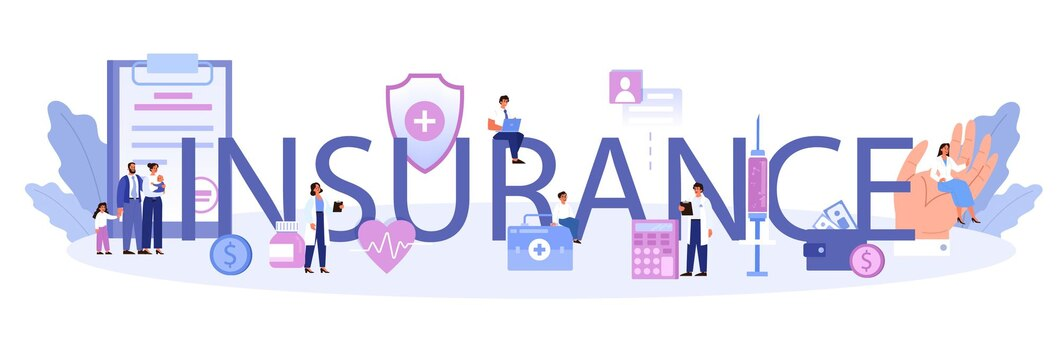

#**Unlocking Insights of Healthcare Insurance Data**

Healthcare Insurance dataset investigates to identify key factors influencing insurance charges. Employing data visualization and statistical methods, the study explores the relationships between charges and variables including age, Body Mass Index (BMI), smoking status, and geographical region. The findings reveal significant correlations, with smoking status and BMI identified as primary drivers of increased charges. Age also demonstrates a positive correlation with costs, while regional variations, though present, exhibit a comparatively lesser impact. The overarching objective is to provide actionable insights for insurance providers to refine risk assessment and pricing strategies, for healthcare professionals to develop targeted interventions, and for individuals to make informed decisions regarding preventive care and health management.

Specifically, the analysis follows a structured approach:

**Individual Factor Analysis:** Initial exploration focuses on the independent relationships between charges and each factor: smoking status, age, and region.

**Combined Effects Visualization:** The analysis progresses to visualize the combined effects and potential interactions between factors, such as the interplay of smoking status and region.

**Distribution Analysis:** The prevalence of smokers, age group distributions, and risk category distributions are examined to provide contextual understanding.

**Multivariate Visualization:** Advanced visualizations, including 3D scatter plots, are used to illustrate the complex relationships between multiple variables, notably age, BMI, and charges.

**Correlation Quantification:** A correlation matrix is generated to quantify the strength and direction of the relationships between all analyzed features.

Let's begin by downloading the data, and listing the files within the dataset.

In [1]:
!pip install opendatasets
import opendatasets as od

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data'

In [3]:
!pip install opendatasets
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data'
od.download(dataset_url)  # Download the dataset using opendatasets

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import warnings
warnings.filterwarnings("ignore")

# Assuming the dataset is downloaded to the current directory under 'healthcare-insurance'
data_path = './healthcare-insurance/insurance.csv'  # Update path if necessary
df = pd.read_csv(data_path)
df.head()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: taniaahossain
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance


100%|██████████| 16.0k/16.0k [00:00<00:00, 8.54MB/s]

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data_dir = '/content/healthcare-insurance'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
os.listdir(data_dir)

['insurance.csv']

In [7]:
project_name = "Healthcare_insurance"

In [8]:
import pandas as pd
import os

In [9]:
healthcare_insurance_report_df = pd.read_csv('/content/healthcare-insurance/insurance.csv')

In [10]:
healthcare_insurance_report_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
healthcare_insurance_report_df.shape

(1338, 7)

In [12]:
healthcare_insurance_report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

##**Exploratory Analysis and Visualization**

##**Charges by Smoker Status**

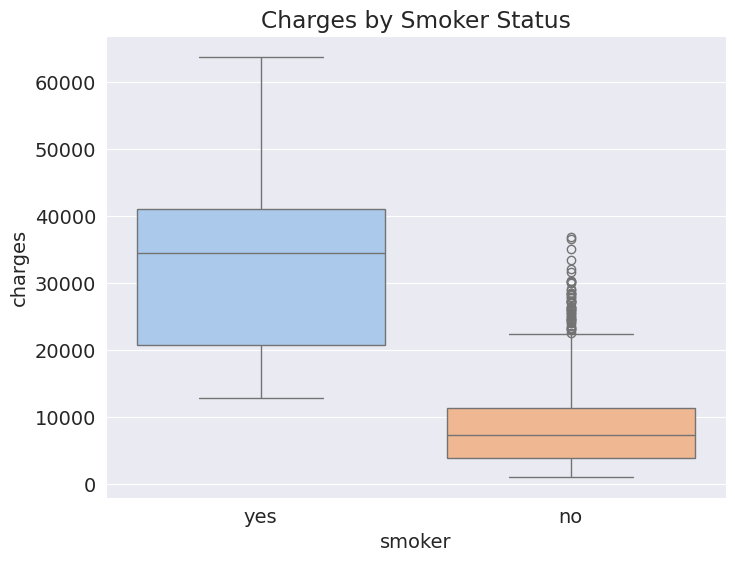

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoker', y='charges', data= df, palette='pastel')
plt.title('Charges by Smoker Status')
plt.show()

##**Charges by Region**

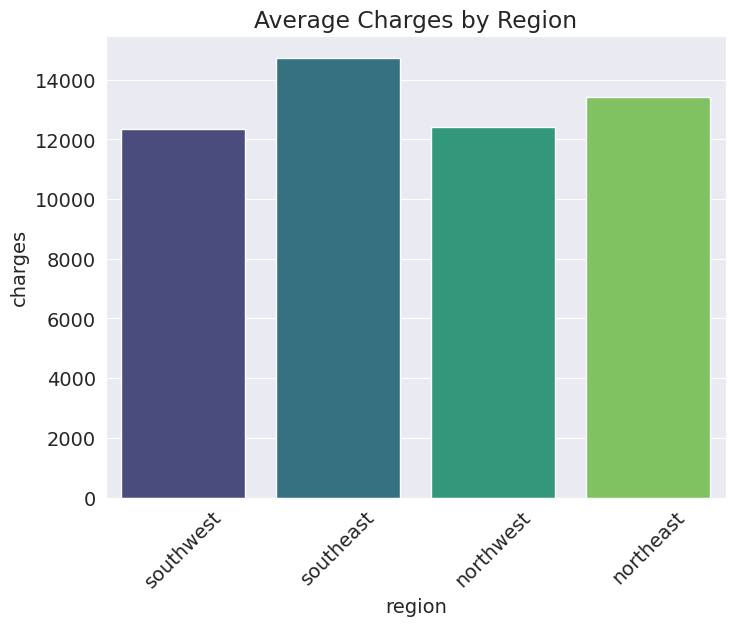

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='region', y='charges', data= df, palette='viridis', ci=None)
plt.title('Average Charges by Region')
plt.xticks(rotation=45)
plt.show()

##**Charges by Age group**

age_group column created and added to the dataframe


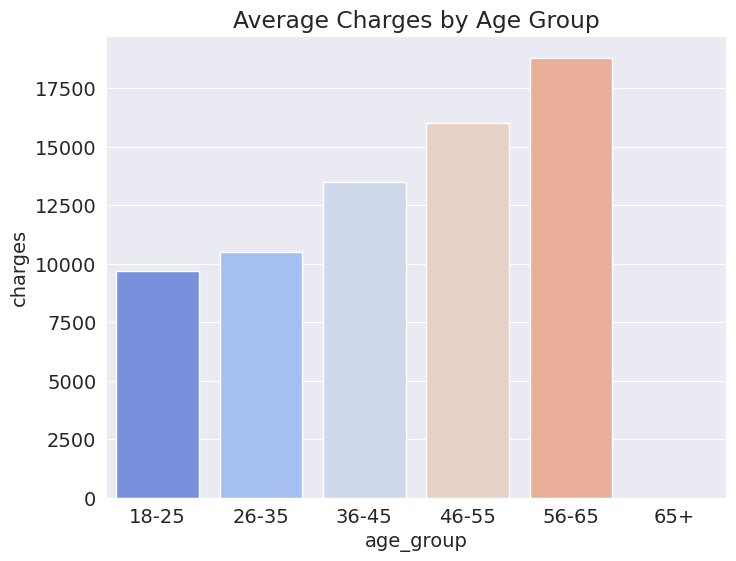

In [21]:
if 'age_group' not in df.columns:
    # Create the 'age_group' column if it doesn't exist
    df['age_group'] = pd.cut(df['age'], bins=[18, 25, 35, 45, 55, 65, float('inf')],
                             labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])
    print("age_group column created and added to the dataframe")

# Now, the barplot should work correctly:
plt.figure(figsize=(8, 6))
sns.barplot(x='age_group', y='charges', data=df, palette='coolwarm', ci=None)
plt.title('Average Charges by Age Group')
plt.show()

##**Combined Visualization for Charges across smoker status and region**

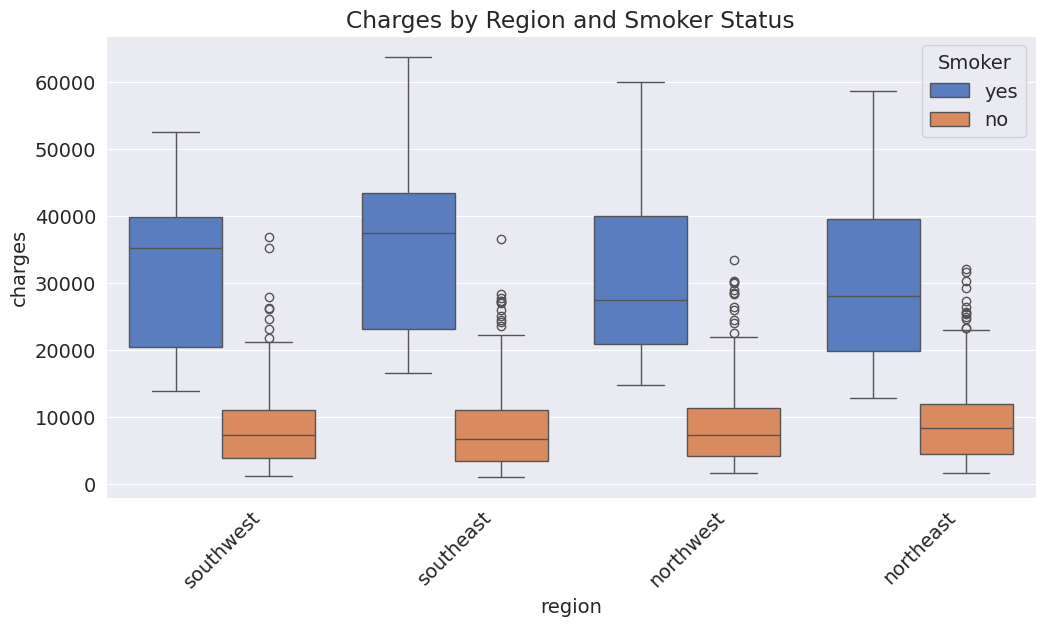

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region', y='charges', hue='smoker', data= df, palette='muted')
plt.title('Charges by Region and Smoker Status')
plt.xticks(rotation=45)
plt.legend(title='Smoker')
plt.show()

This analysis reveals that smoking status is the primary driver of insurance charges, with smokers consistently facing significantly higher costs than non-smokers across all regions. While regional variations in charges exist, they are less pronounced than the impact of smoking. Specifically, the Southeast region shows slightly higher charges for smokers, and the Northeast shows slightly higher charges for non-smokers compared to other regions.

##**Distribution of Smokers by Sex**

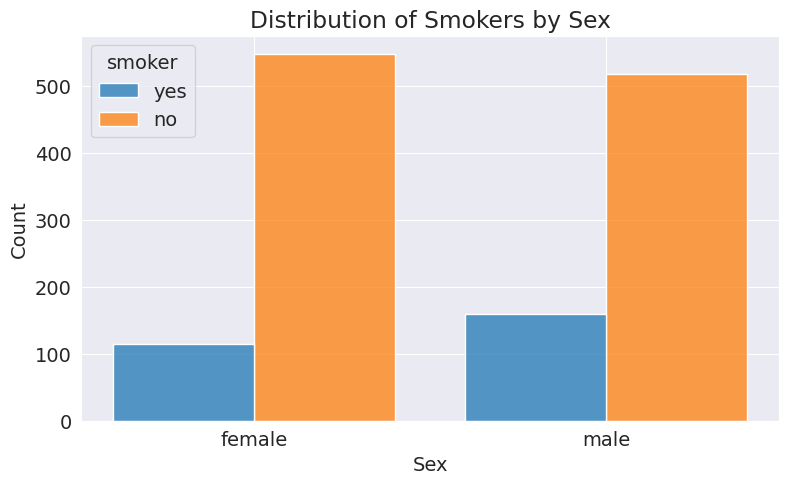

In [ ]:
# Create the histogram
sns.histplot(data=df, x='sex', hue='smoker', multiple='dodge', shrink=.8)

# Customize the plot (optional)
plt.title('Distribution of Smokers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

# Display the plot
plt.show()

The histogram provides a visual representation of the distribution of smokers by sex, allowing for a quick and intuitive understanding of smoking patterns based on gender. By carefully examining the heights of the bars and considering the overall context of the data, we can draw meaningful insights about the prevalence and gender differences in smoking behavior.

##**Distribution of Smoking status**

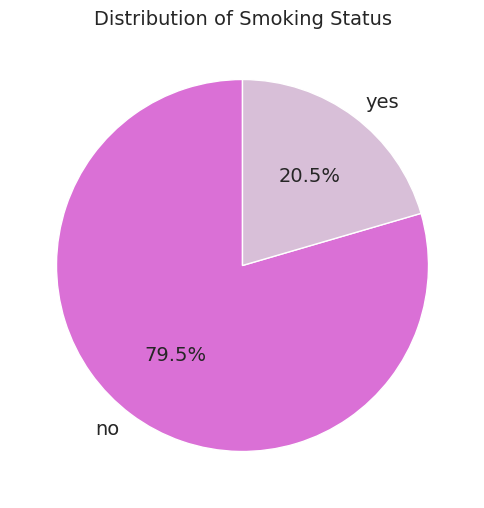

In [ ]:
# Count the number of smokers and non-smokers
smoker_counts = df['smoker'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 8))
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, colors=['orchid', 'thistle'])
plt.title('Distribution of Smoking Status', fontsize=14)
plt.show()

This pie chart analyze the percentage of individuals based on their smoking status (smokers vs. non-smokers)

##**Number of Children vs Average Cost**

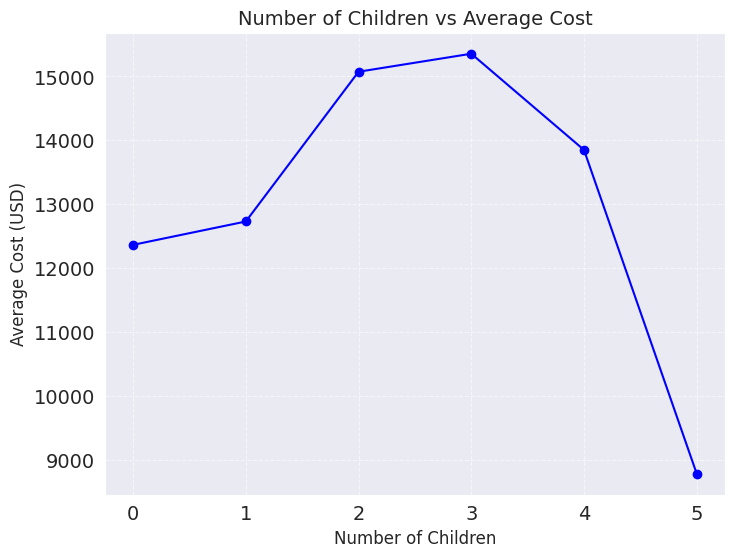

In [15]:
import matplotlib.pyplot as plt

# Group the data by number of children and calculate the average cost for each group
grouped_data = df.groupby('children')['charges'].mean()

# Create a line chart
plt.figure(figsize=(8, 6))
plt.plot(grouped_data.index, grouped_data.values, marker='o', linestyle='-', color='b')

# Add labels and title
plt.title('Number of Children vs Average Cost', fontsize=14)
plt.xlabel('Number of Children', fontsize=12)
plt.ylabel('Average Cost (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(grouped_data.index)  # Ensure only valid points are shown on the x-axis

# Show the chart
plt.show()


##**Cost Comparison for Smoking vs Non-Smoking**

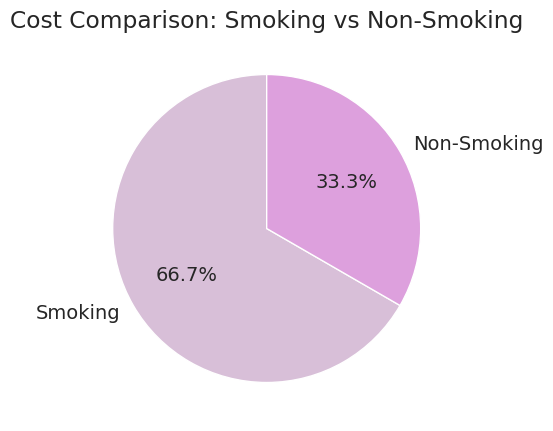

In [29]:
# Sample data (replace with your actual data)
labels = ['Smoking', 'Non-Smoking']
costs = [1000, 500]  # Example costs associated with each category
plt.pie(costs, labels=labels, autopct='%1.1f%%', startangle=90, colors=['thistle', 'plum'])
plt.title('Cost Comparison: Smoking vs Non-Smoking')
plt.show()

 This a pie chart that visually compares the costs associated with smoking and non-smoking. The size of each slice is proportional to the cost, and percentage labels make the comparison clearer.

##**Comparing average charges across age groups and risk categories**

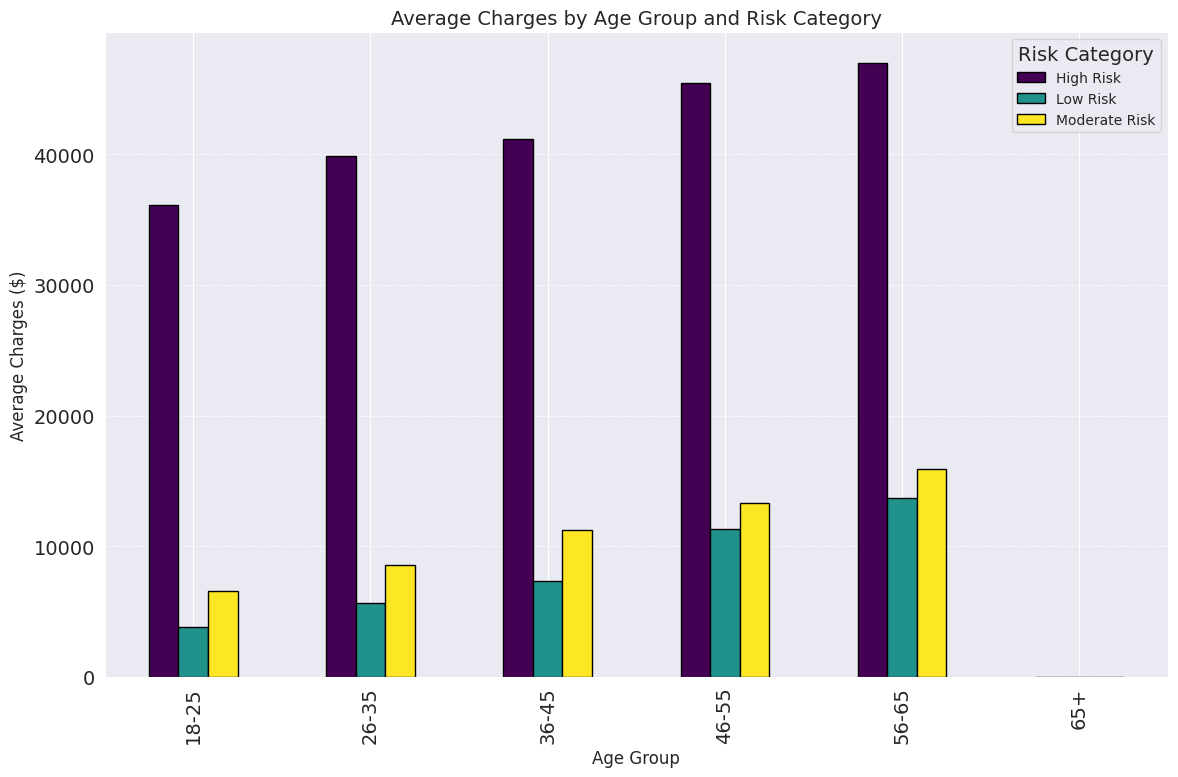

In [ ]:
# Define risk categories
def classify_risk(row):
    if row['smoker'] == 'yes' and row['bmi'] > 30:
        return 'High Risk'
    elif (row['smoker'] == 'yes' and row['bmi'] <= 30) or (row['smoker'] == 'no' and row['bmi'] > 30):
        return 'Moderate Risk'
    else:
        return 'Low Risk'

# Apply the classification
df['risk_category'] = df.apply(classify_risk, axis=1)

# Define age groups
bins = [18, 25, 35, 45, 55, 65, 100]  # Age group ranges
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Group by age group and risk category, calculate mean charges
grouped_data = df.groupby(['age_group', 'risk_category'])['charges'].mean().unstack()

# Plot a clustered bar chart
grouped_data.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')

# Add titles and labels
plt.title('Average Charges by Age Group and Risk Category', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Charges ($)', fontsize=12)
plt.legend(title='Risk Category', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


This plot effectively communicates the complex interplay between age, risk factors (smoking, BMI), and healthcare costs. It provides valuable insights for insurance providers, healthcare professionals, and individuals to understand the financial implications of health-related behaviors and demographics. By identifying high-risk groups and comprehending the cost trends associated with different age and risk profiles, stakeholders can make informed decisions regarding insurance premiums, preventive care, and health interventions.

##**Charges by BMI type and risk**

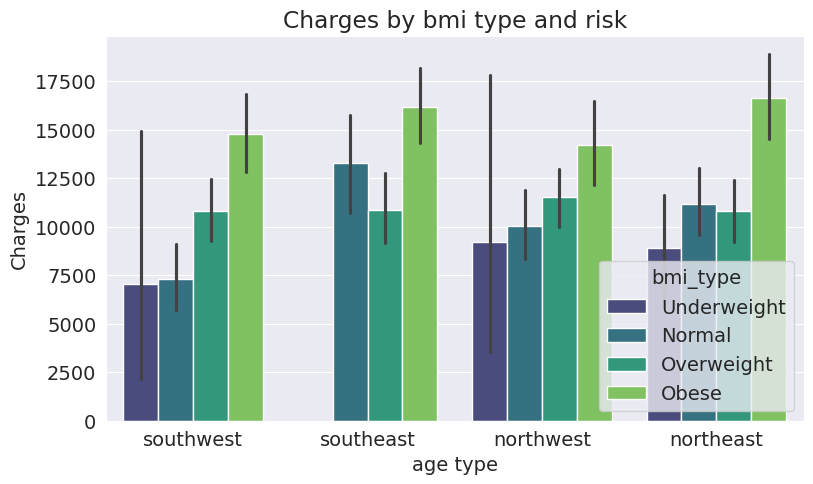

In [ ]:
# Assuming 'df' is your original DataFrame
# Replace with appropriate cleaning and bmi_type creation logic
df_cleaned = df.copy()  # Create a copy to avoid modifying the original DataFrame
# Example: Create bmi_type based on BMI values
df_cleaned['bmi_type'] = pd.cut(df_cleaned['bmi'], bins=[0, 18.5, 24.9, 29.9, float('inf')],
                                 labels=['Underweight', 'Normal', 'Overweight', 'Obese'])

sns.barplot(x=df_cleaned['region'], y=df_cleaned['charges'], palette="viridis", hue=df_cleaned['bmi_type'])

plt.xlabel('age type')
plt.ylabel('Charges')

plt.title('Charges by bmi type and risk')
plt.show()

This analysis reveals that BMI is a key factor in healthcare costs, with higher BMIs correlating with higher insurance charges. Regional variations in costs also exist, likely due to regional factors. The interaction of BMI and region further complicates cost patterns. This information is valuable for insurers (risk assessment and premiums), healthcare providers (targeted interventions), policymakers (public health programs), and individuals (informed health choices).

##**Impact of Age and BMI on charges**

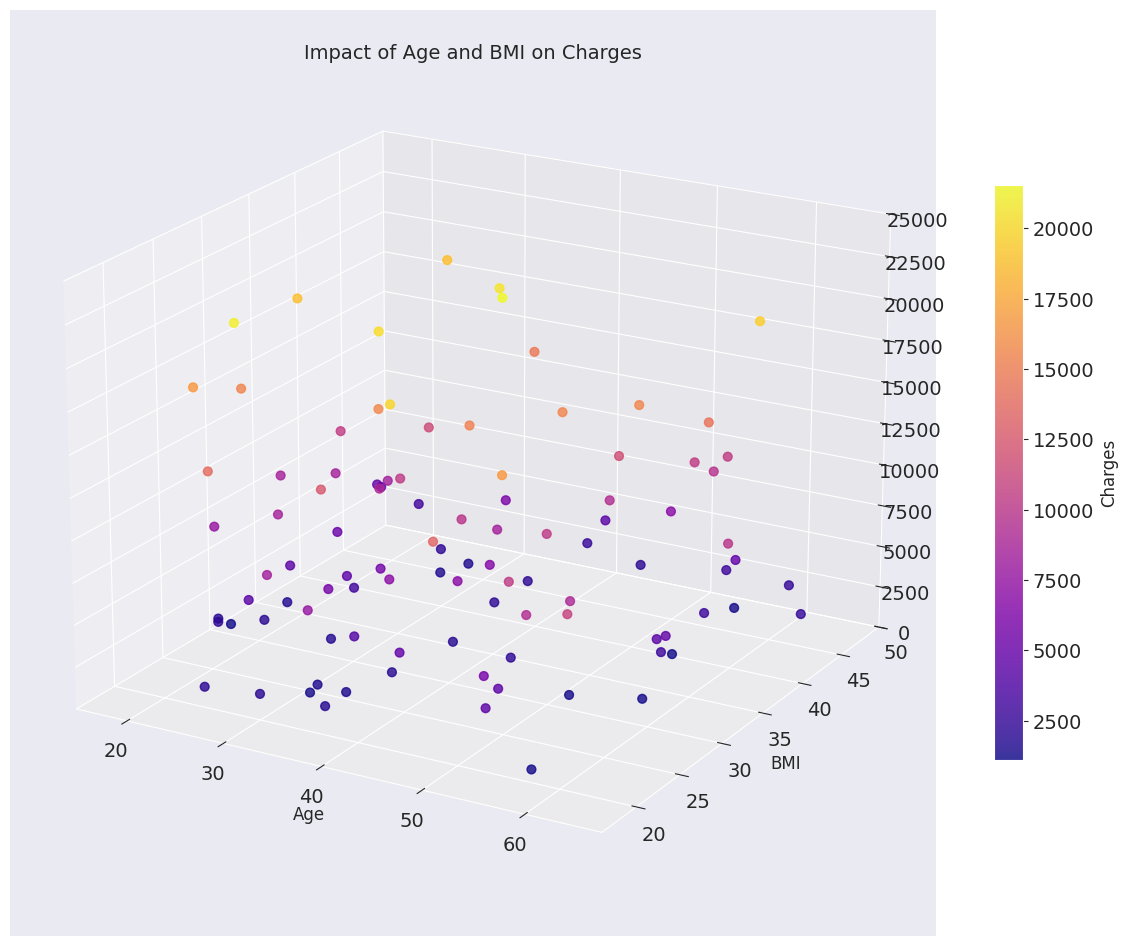

In [ ]:
np.random.seed(0)  # for reproducibility
insurance_data = pd.DataFrame({
    'age': np.random.randint(18, 65, 100),
    'bmi': np.random.rand(100) * 30 + 18,
    'charges': np.exp(np.random.rand(100) * 3 + 7)
})

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    insurance_data['age'],
    insurance_data['bmi'],
    insurance_data['charges'],
    c=insurance_data['charges'],
    cmap='plasma',  # Use 'plasma' colormap as in the image
    s=40,
    alpha=0.8
)

cbar = plt.colorbar(scatter, ax=ax, shrink=0.6)
cbar.set_label('Charges', size=12)

ax.set_xlabel('Age', size=12)
ax.set_ylabel('BMI', size=12)

ax.set_title('Impact of Age and BMI on Charges', size=14, y=1.02)

# Set specific axis ticks and limits to match the image more closely
ax.set_xticks(np.arange(20, 61, 10))  # Ticks from 20 to 60 with step 10
ax.set_yticks(np.arange(20, 51, 5))   # Ticks from 20 to 50 with step 5
ax.set_zticks(np.arange(0, 25001, 2500)) # Ticks from 0 to 25000 with step 2500
ax.set_zlim(0, 25000)

# Adjust view angle to match the image
ax.view_init(elev=20, azim=-60) #Key Change Here

plt.tight_layout()
plt.show()

This 3D scatter plot illustrates the interplay between age, BMI, and insurance charges. Individual data points are plotted in three-dimensional space, with their position determined by their age, BMI, and corresponding charge amount. A 'plasma' colormap is used to represent the magnitude of the charges, with color intensity varying to depict the range from low to high costs.

##**Correlation Between Age, BMI, Smoker Status, Region, and Charges**

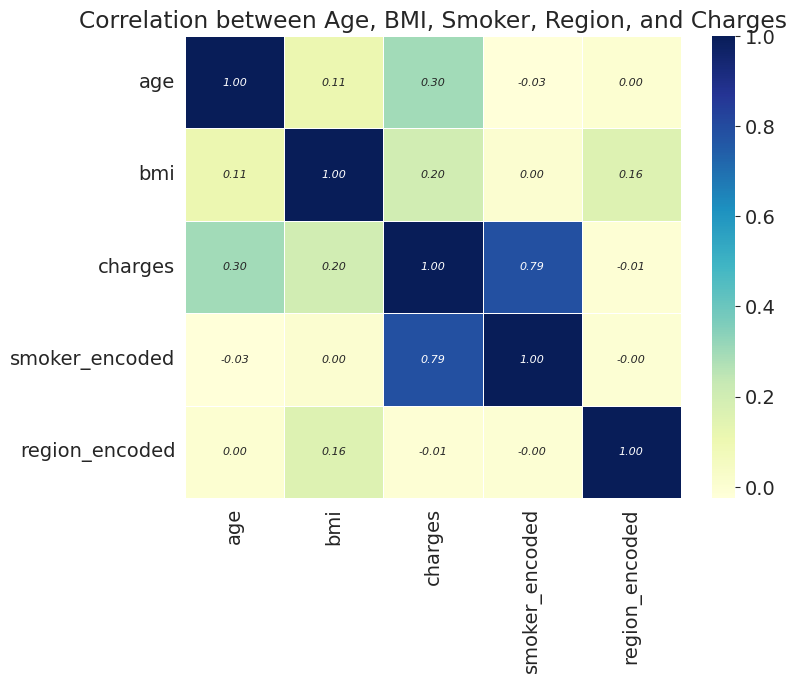

In [ ]:
# Read the dataset using the full path to the file
insurance_data = pd.read_csv('/content/healthcare-insurance/insurance.csv')

# Encode categorical variables for correlation analysis
insurance_data['smoker_encoded'] = insurance_data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)
insurance_data['region_encoded'] = insurance_data['region'].astype('category').cat.codes

# Select relevant columns for correlation
correlation_data = insurance_data[['age', 'bmi', 'charges', 'smoker_encoded', 'region_encoded']]

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', annot_kws={'fontsize': 8, 'fontstyle': 'italic'}, linewidths=0.5)
plt.title('Correlation between Age, BMI, Smoker, Region, and Charges')
plt.show()


This illustration  helps to understand how different factors (age, BMI, smoker status, region) relate to insurance charges by calculating and visualizing their correlation coefficients using a heatmap. This can provide valuable insights into which factors have the strongest relationships with insurance costs.

##**Pairplot with numerical and categorical features**

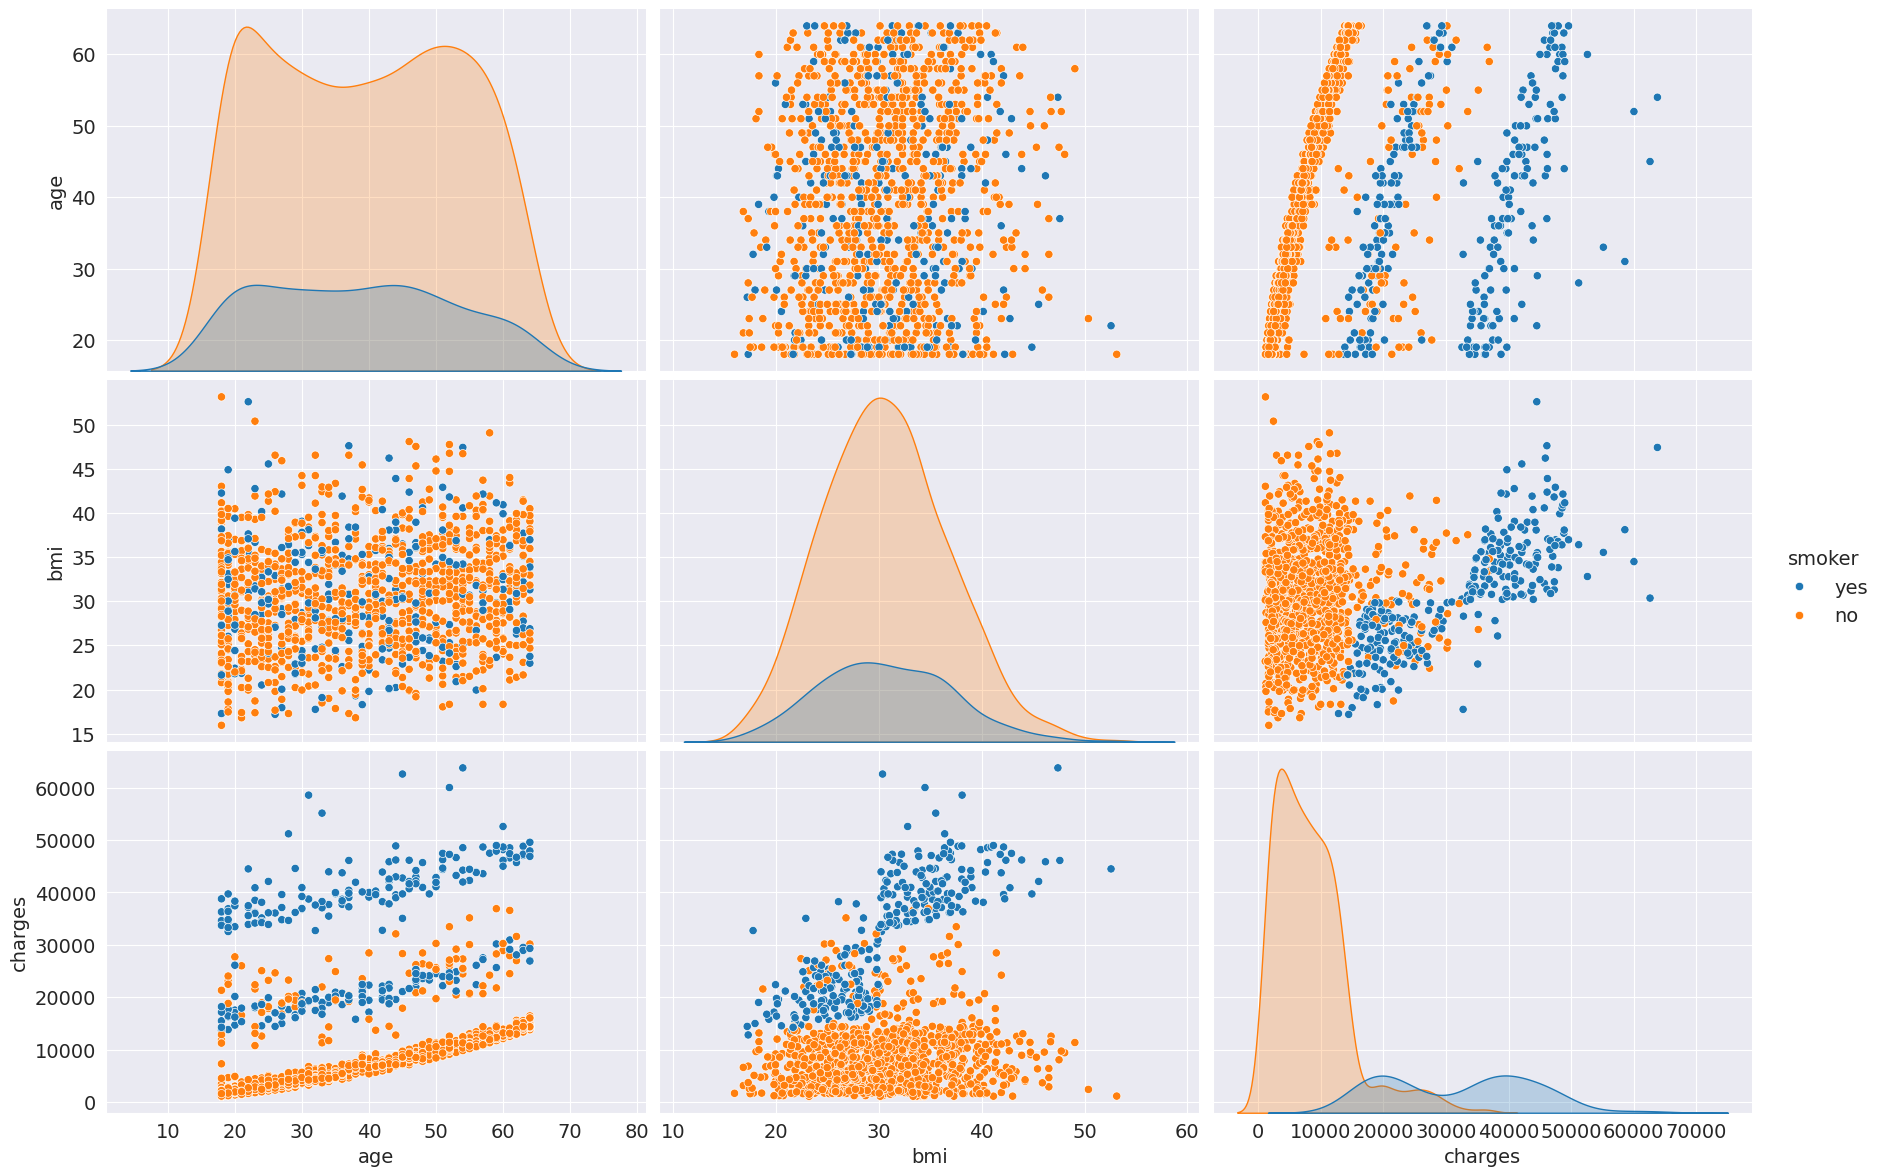

In [ ]:
numerical_features = ['age', 'bmi', 'charges']  # Numerical columns from your DataFrame
categorical_feature = 'smoker'  # Categorical column from your DataFrame

sns.pairplot(insurance_data, vars=numerical_features, hue=categorical_feature, height=4, aspect=1.5, diag_kind='kde')
plt.show()

This code snippet utilizes the sns.pairplot function from Seaborn to create a visualization that explores the relationships between numerical and categorical features in a DataFrame.

##**Conclusion**

This analysis of healthcare insurance data has illuminated key factors influencing insurance charges. **Smoking status** emerged as the strongest predictor, with smokers facing considerably higher costs compared to non-smokers. **BMI** also exhibited a strong positive correlation, emphasizing the impact of weight on healthcare expenses. **Age** played a significant role, demonstrating a gradual increase in charges with advancing age. **Regional variations** in costs were observed, but these were less pronounced compared to the influence of individual factors like smoking and BMI.

These findings have important implications:


*  Insurance providers can utilize this information for refining risk assessment models and developing pricing strategies.
*  Healthcare professionals can leverage these insights to design targeted interventions for high-risk groups.

* Individuals can make more informed decisions about preventive care, health management, and the potential financial impact of lifestyle choices on healthcare costs.

By understanding these driving forces behind insurance charges, stakeholders can proactively manage healthcare costs and contribute to a healthier and more financially secure future.



